<a href="https://colab.research.google.com/github/bharti0420/data_analysis_work/blob/master/result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import DataFrame
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import *
import csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize']=15,8

In [2]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from google.colab import files
uploaded = files.upload()

Saving delhi_data.csv to delhi_data (1).csv


In [4]:
file_name="delhi_data.csv"

for fn in uploaded.keys():
  file_name=fn
print(file_name)

delhi_data.csv


In [5]:
file_name1="data.csv"
with open(file_name,'r') as fin, open(file_name1,'w',newline='') as fout:
    reader=csv.reader(fin,skipinitialspace=True)
    writer=csv.writer(fout,delimiter=',')
    writer.writerow(next(reader))
    for i in reader:
        if float(i[-1]) < 500 and  float(i[-1])>=0:
            writer.writerow(i)
        else:
            i[-1]=0
            writer.writerow(i)
file_n="time_con.csv"

#remove starting null values
with open(file_name1,'r') as fin, open(file_n,'w',newline='') as fout:
    reader=csv.reader(fin,skipinitialspace=True)
    writer=csv.writer(fout,delimiter=',')
    writer.writerow(next(reader))
    flag=0
    value=186
    for i in reader:
        if (float(i[-1])==0 and flag==0):
            pass
        elif(float(i[-1]==0)):
            i[-1]=value
            writer.writerow(i)
        else:
            flag=1
            value=i[-1]
            writer.writerow(i)            
df_data=pd.read_csv(file_n)
df_data.rename(columns={'Date (LT)': 'date'},inplace=True)
df_data['date'] = pd.to_datetime(df_data.date)
#df_data.to_csv(file_name,index=False)
df=df_data.set_index(['date'])
print(len(df))

33019


In [6]:
df=df.resample('D').mean()
df.to_csv('result.csv')
df.dropna(inplace=True)
len(df)
#print(df)

1376

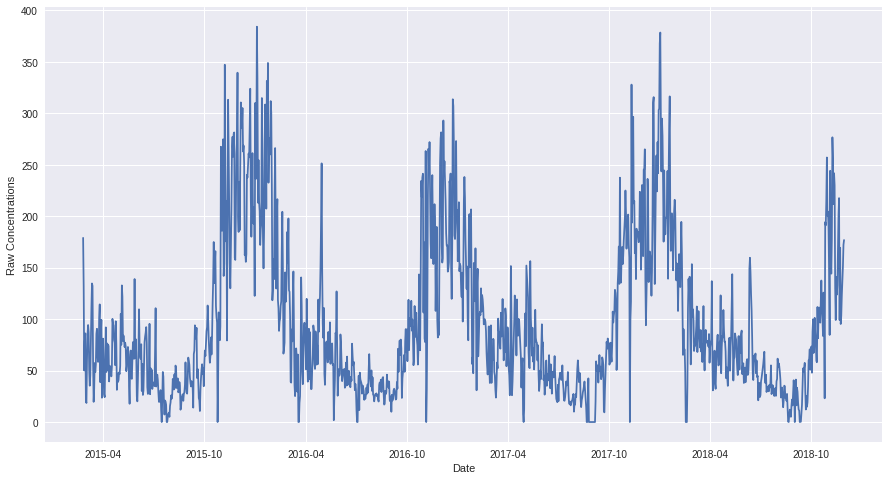

In [7]:
plt.xlabel("Date")
plt.ylabel("Raw Concentrations")
plt.plot(df)

In [0]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [0]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 7, center = False).mean()
    rol_std = ts.rolling(window = 7, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    #plt.xticks(fontsize = 25)
    #plt.yticks(fontsize = 25)
    
    plt.xlabel('Date')
    plt.ylabel('Raw Conc.')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= True)

In [0]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts['Raw Conc.'], autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

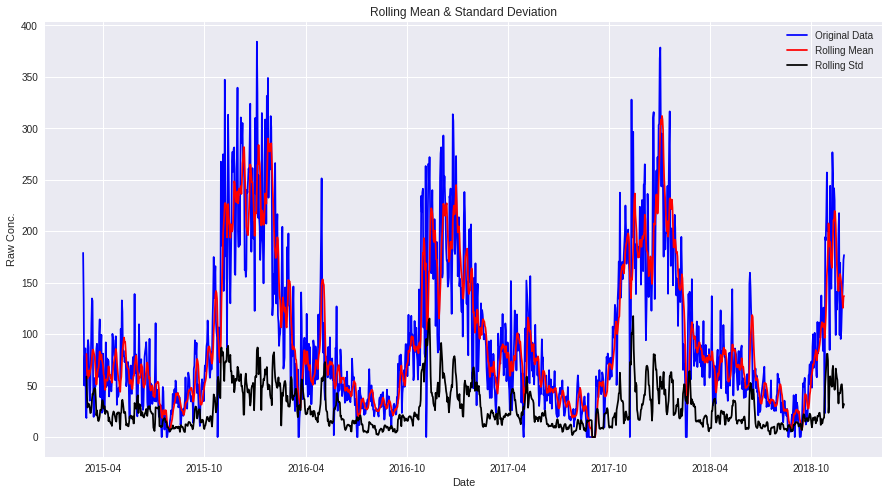

In [11]:
TestStationaryPlot(df)

In [12]:
TestStationaryAdfuller(df)

Test Statistic                   -2.517817
p-value                           0.111199
#Lags Used                       23.000000
Number of Observations Used    1352.000000
Critical Value (1%)              -3.435196
Critical Value (5%)              -2.863680
Critical Value (10%)             -2.567909
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


##Moving average

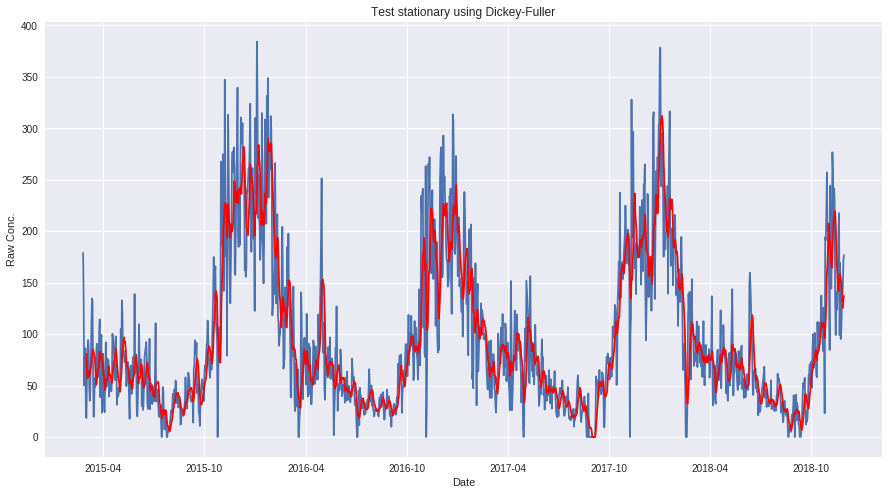

In [13]:
moving_avg = df.rolling(7).mean()
plt.plot(df)
plt.plot(moving_avg, color='red')
#plt.xticks(fontsize = 25)
#plt.yticks(fontsize = 25)
plt.xlabel('Date')
plt.ylabel('Raw Conc.')
plt.title('Test stationary using Dickey-Fuller')
plt.show()

In [14]:
mte_moving_avg_diff = df - moving_avg
mte_moving_avg_diff.head(8)

,Raw Conc.
date,
2015-02-24,NaN
2015-02-25,NaN
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN
2015-03-01,NaN
2015-03-02,-62.236529
2015-03-03,-3.886905


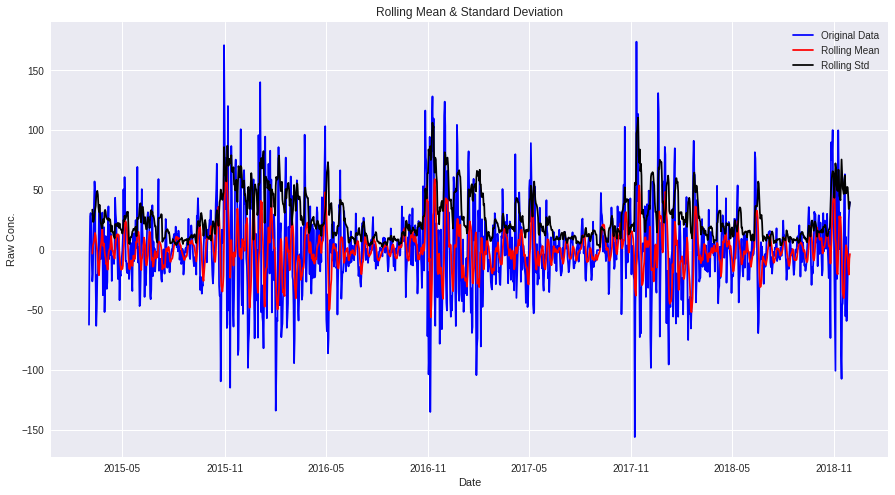

In [15]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)
#mte_moving_avg_diff.head(2)

In [16]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                -7.797820e+00
p-value                        7.633805e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.346000e+03
Critical Value (1%)           -3.435218e+00
Critical Value (5%)           -2.863690e+00
Critical Value (10%)          -2.567914e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


##Exponentail weighted moving average

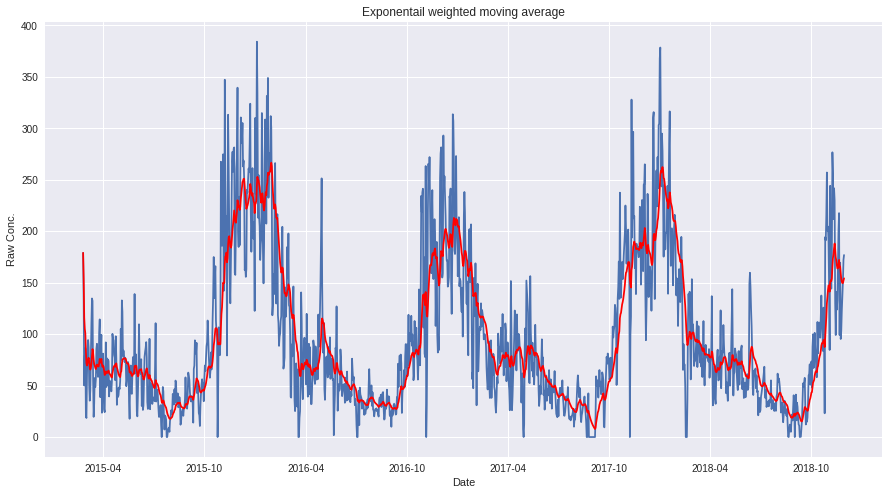

In [17]:
mte_exp_wighted_avg = df.ewm(halflife=7,min_periods=0,adjust=True).mean()
plt.plot(df)
plt.plot(mte_exp_wighted_avg, color='red')


plt.xlabel('Date')
plt.ylabel('Raw Conc.')
plt.title('Exponentail weighted moving average')
plt.show()

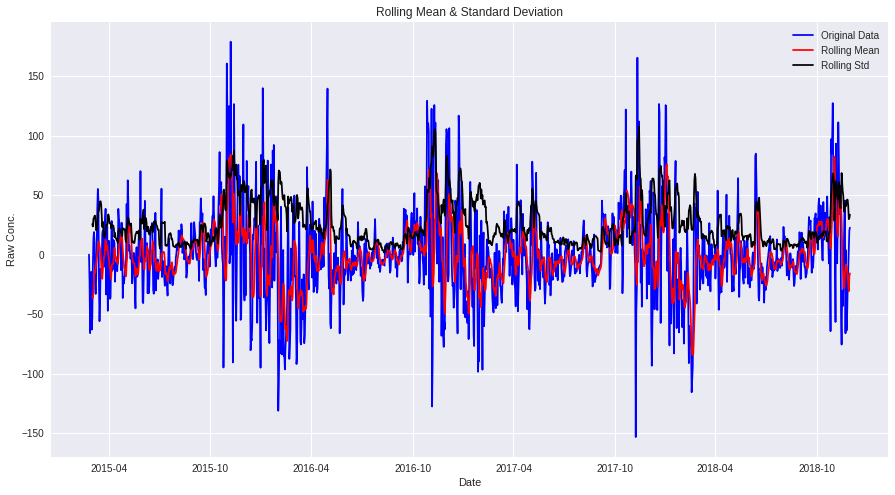

In [18]:
mte_ewma_diff = df- mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [19]:
TestStationaryAdfuller(mte_ewma_diff)

Test Statistic                   -5.086339
p-value                           0.000015
#Lags Used                       23.000000
Number of Observations Used    1352.000000
Critical Value (1%)              -3.435196
Critical Value (5%)              -2.863680
Critical Value (10%)             -2.567909
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


##Eliminating trend and seasonality: Differencing

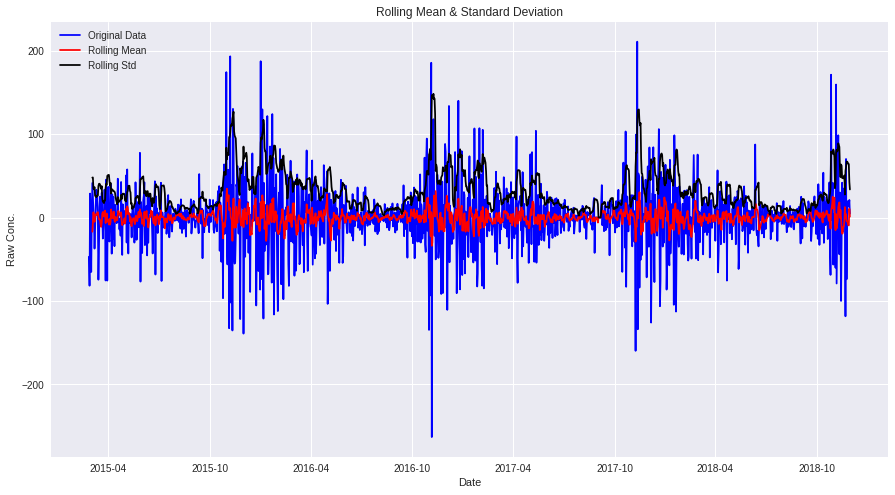

In [20]:
mte_first_difference = df- df.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [21]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                -9.039754e+00
p-value                        5.171800e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.352000e+03
Critical Value (1%)           -3.435196e+00
Critical Value (5%)           -2.863680e+00
Critical Value (10%)          -2.567909e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


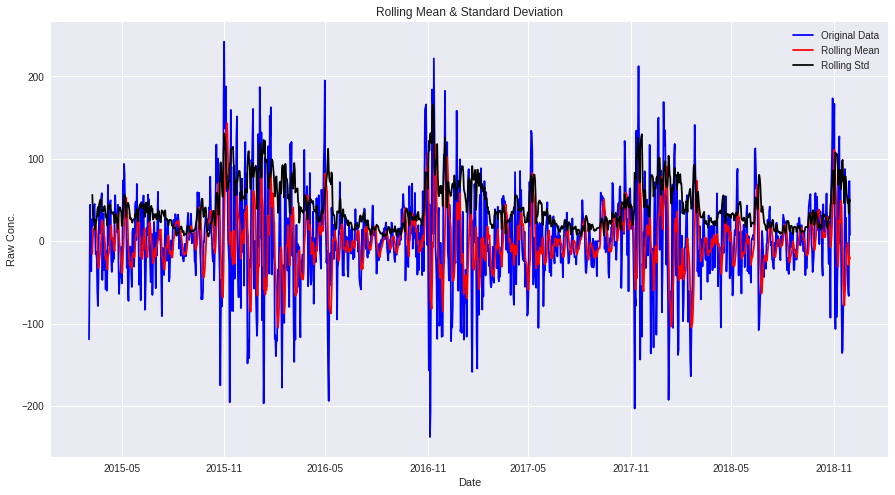

Test Statistic                -6.797932e+00
p-value                        2.275669e-09
#Lags Used                     2.400000e+01
Number of Observations Used    1.344000e+03
Critical Value (1%)           -3.435225e+00
Critical Value (5%)           -2.863693e+00
Critical Value (10%)          -2.567916e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [22]:
mte_seasonal_difference = df- df.shift(7)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

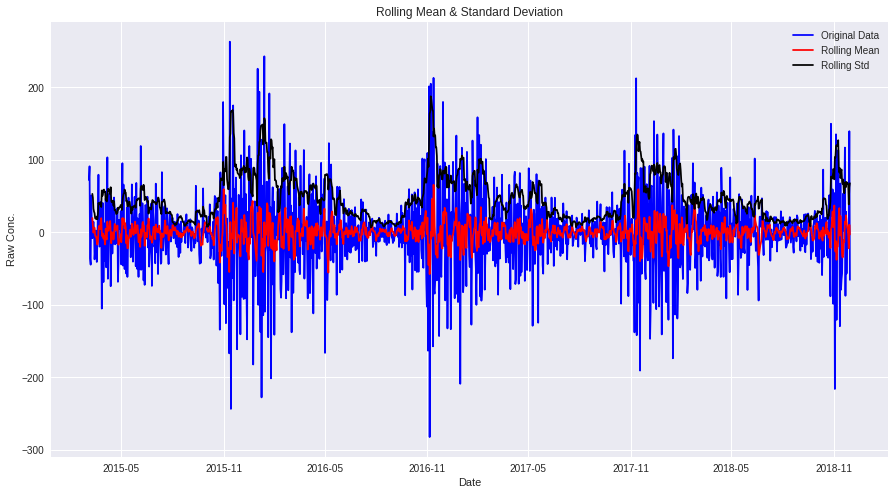

In [23]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(7)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [24]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.364477e+01
p-value                        1.627514e-25
#Lags Used                     2.400000e+01
Number of Observations Used    1.343000e+03
Critical Value (1%)           -3.435229e+00
Critical Value (5%)           -2.863694e+00
Critical Value (10%)          -2.567917e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


##Eliminating trend and seasonality: Decomposing

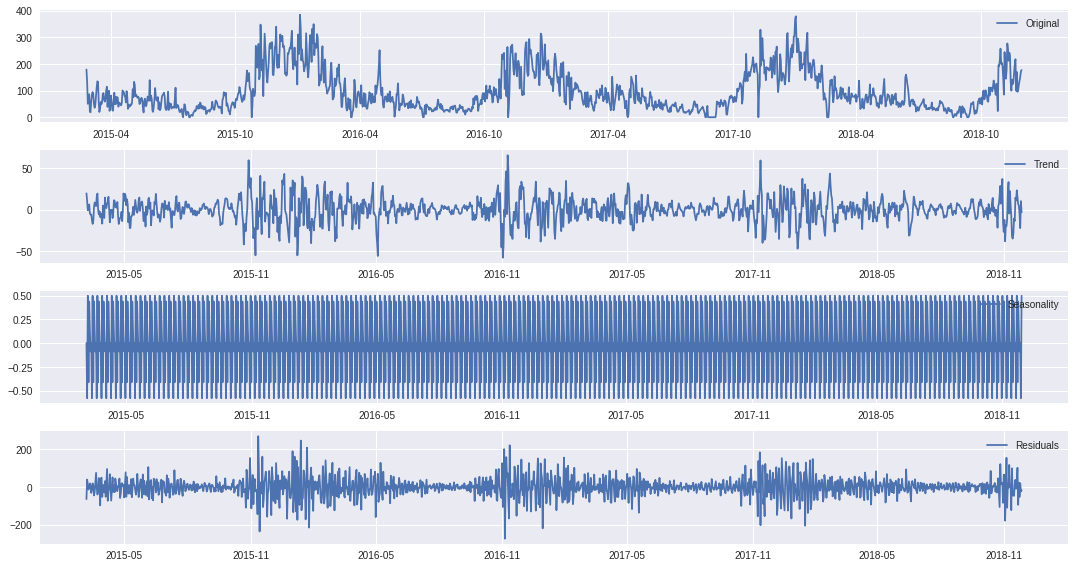

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mte_seasonal_first_difference.dropna(inplace=False))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

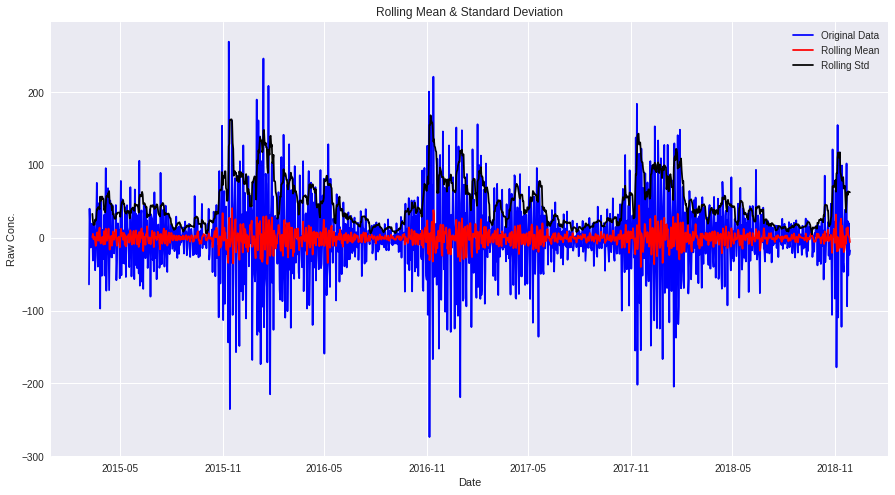

Test Statistic                  -20.686075
p-value                           0.000000
#Lags Used                       24.000000
Number of Observations Used    1337.000000
Critical Value (1%)              -3.435250
Critical Value (5%)              -2.863704
Critical Value (10%)             -2.567922
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [26]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

##Grid search(P,D,Q)

In [27]:
import itertools
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 1, 0) x (0, 1, 0, 7)


In [28]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 7), (0, 0, 1, 7), (0, 1, 0, 7), (0, 1, 1, 7), (1, 0, 0, 7), (1, 0, 1, 7), (1, 1, 0, 7), (1, 1, 1, 7)]


In [29]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,order=param,seasonal_order=seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            #print(param, seasonal_param, results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:16080.995721392077
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:14493.026913143007
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:14875.748130705168
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:14554.827046612778
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:14564.652807740307
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:14480.916153366998
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:15747.894077900084
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:15118.484122153825
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:14503.069225964595
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:13967.817683114466
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:14407.392162893408
ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:14025.976618696168
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:14119.52638161197
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:13960.286169719076
ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:13822.443167739686
ARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:13784.94270807764
ARIMA(0, 1, 0)x(1, 0, 0, 7) - AIC:13832.0754745954
ARIMA(0, 1, 0)x(1, 0, 1, 7) - AIC:13824.15804779961
ARIMA(0, 1, 0)x(1, 1, 0, 7) - AIC:14367.20705557397

In [30]:
mod = sm.tsa.statespace.SARIMAX(df, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,7),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                         Raw Conc.   No. Observations:                 1376
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -6766.863
Date:                           Fri, 11 Jan 2019   AIC                          13541.725
Time:                                   08:40:02   BIC                          13562.633
Sample:                               02-24-2015   HQIC                         13549.548
                                    - 11-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5044      0.026     19.511      0.000       0.454       0.555
ma.L1         -0.8827      0.014    -61.285

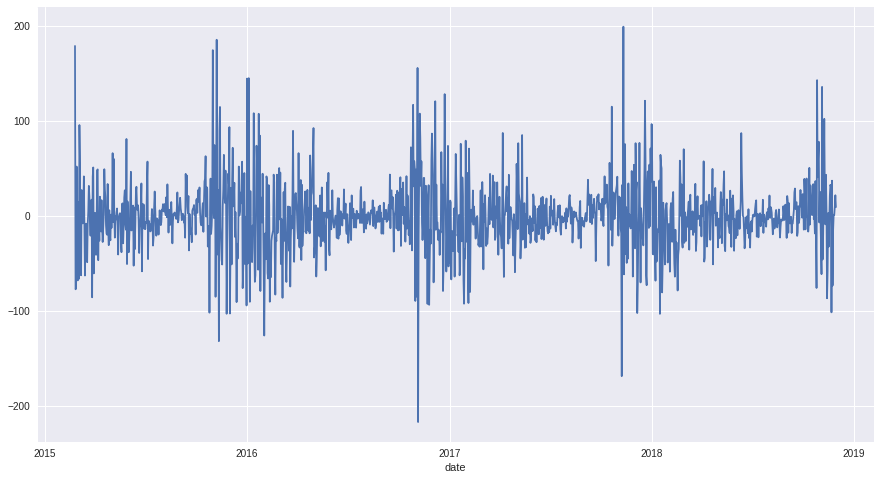

In [31]:
results.resid.plot()

In [32]:
print(results.resid.describe())

count    1376.000000
mean       -0.150308
std        35.716699
min      -216.846130
25%       -16.444555
50%        -1.064390
75%        14.222144
max       199.236765
dtype: float64


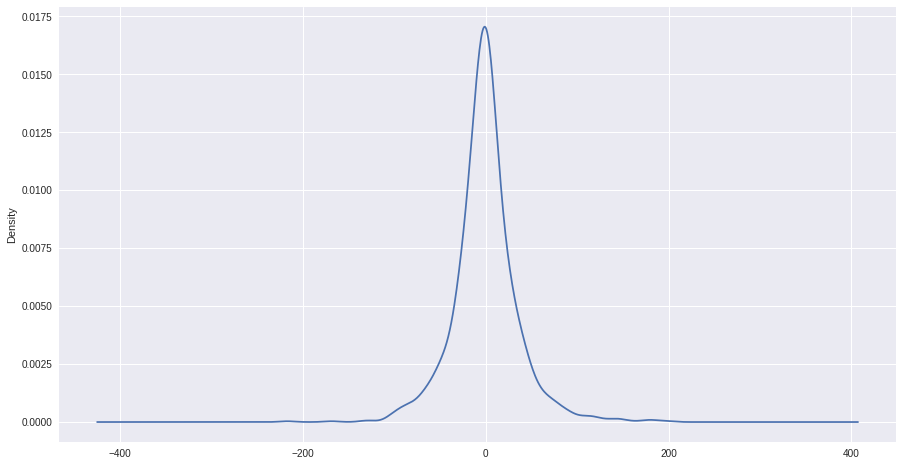

In [33]:
results.resid.plot(kind='kde')

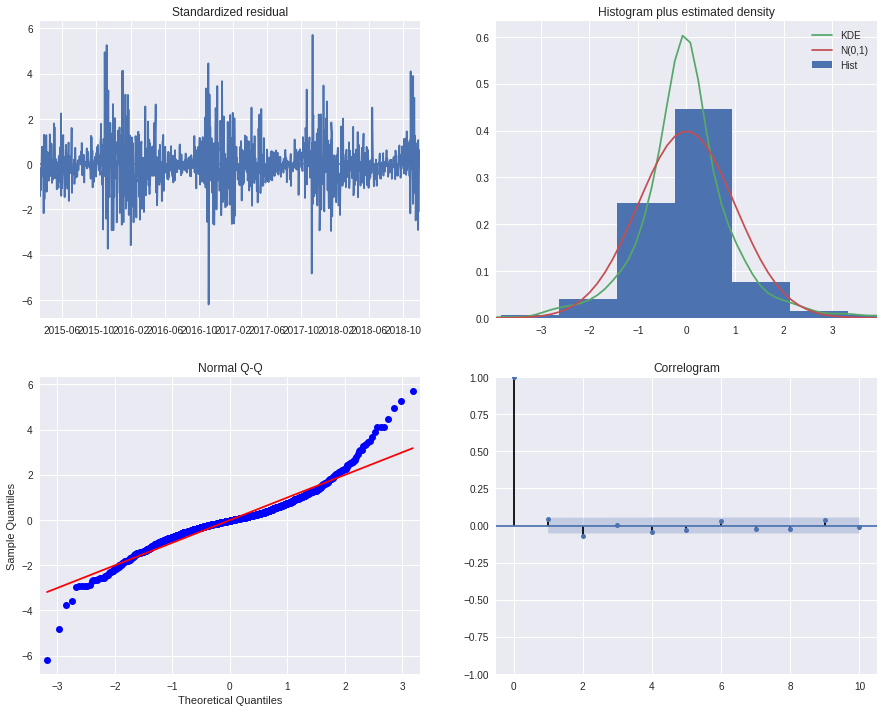

In [34]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [35]:
pred = results.get_prediction(start = 1315, end =1375, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Raw Conc.,upper Raw Conc.
2018-10-01,-26.425546,110.169713
2018-10-02,-10.275957,126.319221
2018-10-03,-6.025758,130.568469
2018-10-04,-19.502653,117.091293
2018-10-05,8.093441,144.687169


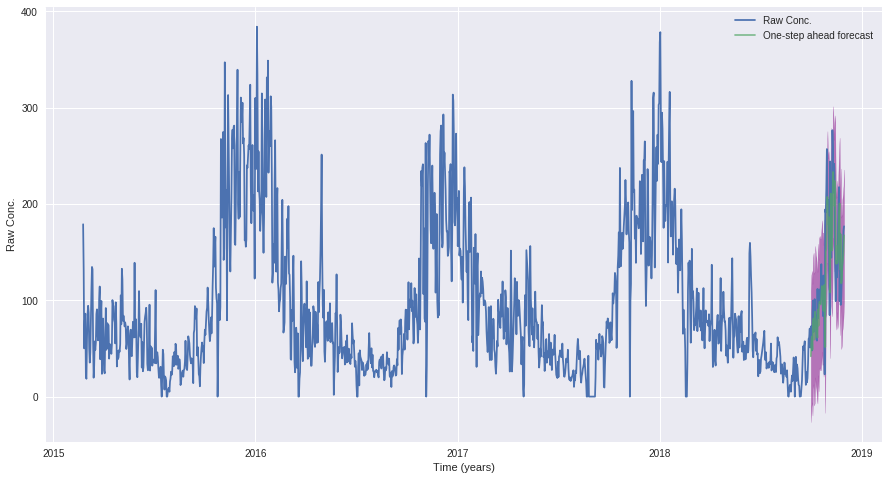

In [36]:
ax = df['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='purple', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Raw Conc.')
plt.legend()

plt.show()

In [0]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
mte_original=ts['Raw Conc.']

In [38]:
mte_forecast = pred.predicted_mean
mte_truth = mte_original['2018-10-01':]
# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 2019.11
The Root Mean Square Error (RMSE) of the forcast: 44.9345
